In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# 讀入Minst數據

In [8]:
from tensorflow.keras.datasets import mnist

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 11s 1us/step


# 數據集內容

In [10]:
len(x_train)

60000

In [46]:
len(x_test)

10000

In [12]:
n = 9487

In [14]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [15]:
y_train[n]

1

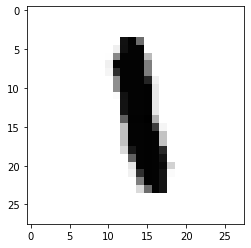

In [17]:
plt.imshow(x_train[n], cmap = 'Greys');

# 資料整理

In [18]:
np.array([3,78,95,99])/100

array([0.03, 0.78, 0.95, 0.99])

In [19]:
x_train = x_train/255
x_test = x_test/255

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
28*28

784

In [24]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [27]:
from tensorflow.keras.utils import to_categorical

In [29]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test,10)
y_train[n]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 打造神經網路

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [31]:
model = Sequential()

In [32]:
model.add(Dense(87, input_dim=784,activation= 'relu')) #第一層

In [33]:
model.add(Dense(87, activation = 'relu')) #第二層

In [34]:
model.add(Dense(10, activation = 'softmax')) #第三層

# 組裝神經網路

In [35]:
model.compile(loss = 'mse',optimizer = SGD(lr=0.087), metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 87)                68295     
_________________________________________________________________
dense_1 (Dense)              (None, 87)                7656      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                880       
Total params: 76,831
Trainable params: 76,831
Non-trainable params: 0
_________________________________________________________________


In [37]:
784*87+87

68295

# 訓練

In [38]:
model.fit(x_train,y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0832 - accuracy: 0.3219
Epoch 2/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0539 - accuracy: 0.6878
Epoch 3/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0297 - accuracy: 0.8472
Epoch 4/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0216 - accuracy: 0.8758
Epoch 5/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0186 - accuracy: 0.8884
Epoch 6/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0169 - accuracy: 0.8959
Epoch 7/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0157 - accuracy: 0.9015
Epoch 8/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0149 - accuracy: 0.9056
Epoch 9/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0143 - accuracy: 0.9095
Epoch 10/20
60

# 訓練成果

In [39]:
result = model.predict_classes(x_test)

In [40]:
from ipywidgets import interact_manual

請輸入n值為:9995
神經網路預測是: 2


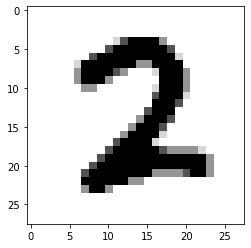

In [45]:
n = int(input("請輸入n值為:"))

print('神經網路預測是:', result[n])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys');